In [556]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import pyreadstat
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
from matplotlib import cm
import seaborn as sns

In [557]:
raw_data = pd.read_spss('anes_timeseries_cdf.sav')

In [558]:
data = raw_data.rename(columns ={'VCF0004': 'year','VCF0006':'number_of_resp','VCF0006a':'resp_id','VCF0017':'interview_mode',
                                 'VCF0018a':'lng_of_interview',
                                 'VCF0050a':'resp_level_of_political_info_pre','VCF0050b':'resp_level_of_political_info_post',
                                 'VCF0101':'resp_age',
                                 'VCF0102':'resp_age_group','VCF0104':'resp_gender','VCF0105a':'race_7_categ',
                                 'VCF0105b':'race_4_categ','VCF0106':'race_3_categ',
                                 'VCF0110':'resp_educ','VCF0111':'urban','VCF0113':'resp_south_north',
                                 'VCF0114':'fam_inc','VCF0138':'number_of_kids',
                                 'VCF0143':'native_parents','VCF0147':'married','VCF0155':'worried_about_job',
                                 'VCF0157':'reduced_job',
                                 'VCF0301':'party_feelings','VCF0306':'party_father','VCF0307':'party_mother',
                                 'VCF0310':'interest_in_elections',
                                 'VCF0338':'pres_intellegent','VCF0339':'pres_compassion','VCF0340':'pres_decent',
                                 'VCF0343':'pres_moral',
                                 'VCF0342':'pres_knowledgable','VCF0344':'pres_leadership','VCF0345':'pres_cares',
                                 'VCF0450':'pres_approval','VCF0615':'important_to_vote','VCF0653':'pres_performance',
                                 'VCF0700':'who_will_be_eleced','VCF0703':'turnout','VCF0704':'voted_for_who',
                                 'VCF0712':'when_decided','VCF0734':'intended_vs_real'})

In [559]:
# checking the % of nan's in data.

data[['year','voted_for_who','race_4_categ','party_feelings',
                                                'resp_level_of_political_info_pre','interest_in_elections',
                                                'resp_age_group','resp_educ','urban','resp_south_north','fam_inc',
                                                'married',
                                                'reduced_job','important_to_vote', 
                                                'when_decided', 'intended_vs_real']].isna().sum()/ len(data) * 100

year                                 0.000000
voted_for_who                       57.617109
race_4_categ                         2.660817
party_feelings                       2.797611
resp_level_of_political_info_pre    55.970573
interest_in_elections                8.080875
resp_age_group                       0.924196
resp_educ                            0.985920
urban                               27.845990
resp_south_north                     3.004471
fam_inc                              9.090151
married                              4.147204
reduced_job                         67.614774
important_to_vote                   72.903043
when_decided                        67.838316
intended_vs_real                    54.170559
dtype: float64

In [560]:
# checking % nan's of VAR's of interest in 1980:
# We can see that 100% of "reduced job". cannot take this VAR into consideraition for our analysis.

data[data['year'] == 1980.0][['year','voted_for_who','race_4_categ','party_feelings',
                                                'resp_level_of_political_info_pre','interest_in_elections',
                                                'resp_age_group','resp_educ','urban','resp_south_north','fam_inc',
                                                'married','reduced_job',
                                                'important_to_vote','resp_gender',
                                                'when_decided', 'intended_vs_real']].isna().sum()#/len(data[data['year'] == 1980.0])

year                                   0
voted_for_who                        656
race_4_categ                           0
party_feelings                         2
resp_level_of_political_info_pre       5
interest_in_elections                 47
resp_age_group                         2
resp_educ                              4
urban                                  0
resp_south_north                       0
fam_inc                              190
married                                2
reduced_job                         1614
important_to_vote                     47
resp_gender                            0
when_decided                         630
intended_vs_real                     578
dtype: int64

In [561]:
190 + 145

335

In [562]:
data_clean_1980 = data[data['year'] == 1980.0][['year','voted_for_who','race_4_categ','party_feelings',
                                                'resp_level_of_political_info_pre','interest_in_elections',
                                                'resp_age_group','resp_educ','urban','resp_south_north','fam_inc',
                                                'married','resp_gender',
                                                'important_to_vote', 
                                                'when_decided', 'intended_vs_real']].dropna()

In [563]:
# making sure that our clean sample is indeed reflective of what happened in the elections.

data_clean_1980['voted_for_who'].value_counts()/len(data_clean_1980) * 100

2. Republican                                            52.837327
1. Democrat                                              38.461538
3. Major third party candidate (Wallace 1968/Anderson     8.701135
Name: voted_for_who, dtype: float64

In [564]:
# actual election results: 
# Rep:50.7%
# Dem: 41.0%
# Independent: 6.6%

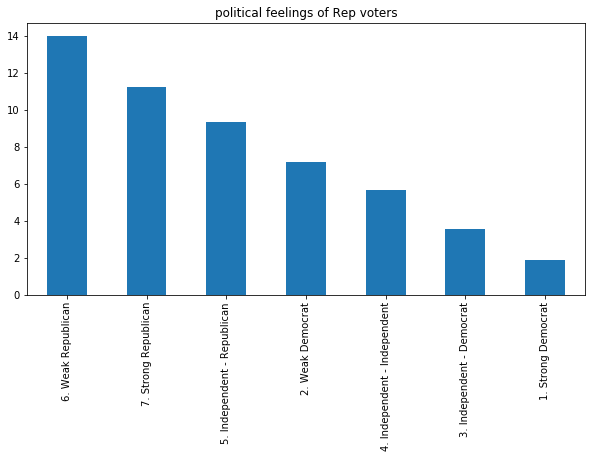

In [565]:
# What were the political feelings of those who voted Rep?

(data_clean_1980[data_clean_1980['voted_for_who'] == '2. Republican']['party_feelings'].value_counts()/len(data_clean_1980)*100).plot(kind = 'bar', title = 'political feelings of Rep voters',figsize = (10,5))

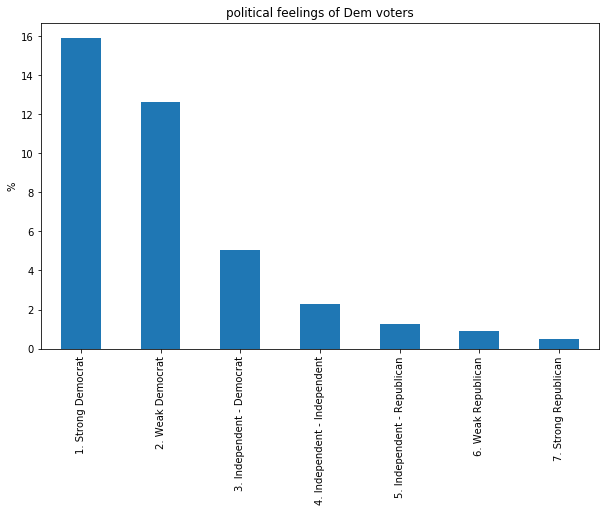

In [566]:
# political feelings of Dem voters in 1980.

(data_clean_1980[data_clean_1980['voted_for_who'] == '1. Democrat']['party_feelings'].value_counts()/len(data_clean_1980)*100).plot(kind = 'bar', title = 'political feelings of Dem voters', figsize = (10,6), ylabel = '%')

In [567]:
voted_republican_1980 = data_clean_1980[(data_clean_1980['voted_for_who'] == '2. Republican')]

In [568]:
voted_republican_1980['party_feelings'].value_counts()

6. Weak Republican              111
7. Strong Republican             89
5. Independent - Republican      74
2. Weak Democrat                 57
4. Independent - Independent     45
3. Independent - Democrat        28
1. Strong Democrat               15
Name: party_feelings, dtype: int64

In [569]:
switched_1980 = voted_republican_1980[(voted_republican_1980['party_feelings'] == '1. Strong Democrat') |
                                      (voted_republican_1980['party_feelings'] == '2. Weak Democrat') |
                                      (voted_republican_1980['party_feelings'] == '3. Independent - Democrat') |
                                      (voted_republican_1980['party_feelings'] == '4. Independent - Independent')].reset_index()
                

In [570]:
# The sample size we will work on, those who switched.

# Issue: should we include "week dem"? We need more qualatative data to 
#answer this question (perhaps track of historic votes)

len(switched_1980)

145

## Gender

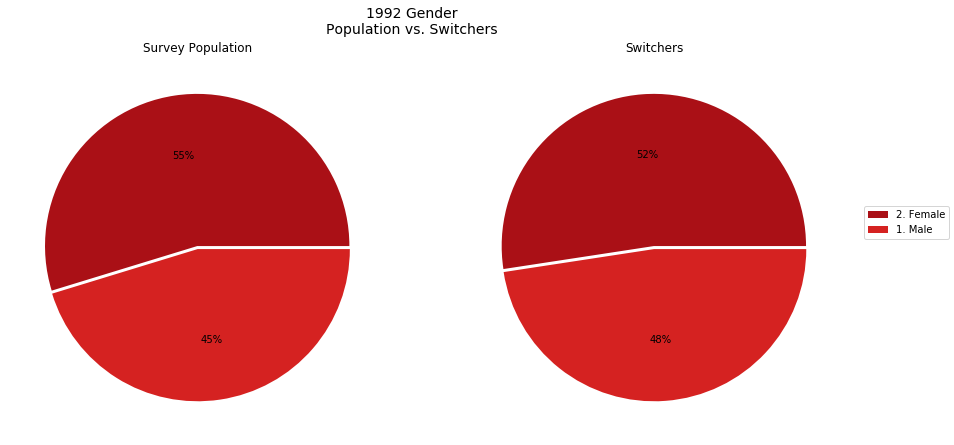

In [670]:
fig, (ax1, ax2) = plt.subplots(1,2)

(data_clean_1980['resp_gender'].value_counts()[data_clean_1980['resp_gender'].value_counts() > 0]/len(data_clean_1980)*100).plot(kind = 'pie', 
                                                                              ax=ax1,
                                                                              autopct='%.0f%%',
                                                                              labels = None,
                                                                              explode = (0.01,0.01),
                                                                              colors = sns.color_palette('Reds_r')
                                                                              )
                                                                                                         
ax1.yaxis.set_label_text("")
ax1.set_title("Survey Population")


(switched_1980['resp_gender'].value_counts()[switched_1980['resp_gender'].value_counts() > 0]/len(switched_1980) *100).plot(kind='pie', 
                                                                            ax=ax2, 
                                                                            autopct='%.0f%%',
                                                                            labels = None,
                                                                            explode = (0.01,0.01),
                                                                            colors = sns.color_palette('Reds_r')                                              
                                                                            )
ax2.yaxis.set_label_text("")
ax2.set_title("Switchers")


fig.subplots_adjust(hspace=50000)
fig.set_figheight(7)
fig.set_figwidth(15)
fig.legend(labels = data_clean_1980['resp_gender'].value_counts()[data_clean_1980['resp_gender'].value_counts() > 0].index, loc = 'right')
fig.suptitle("1992 Gender\nPopulation vs. Switchers",size = 14)
fig.savefig('C:/Users/Yotam/Documents/Courses/Fall 2020/ADS/Fall2020-Project1-yotamsegal/figs/1980 Gender.png', transparent=True)

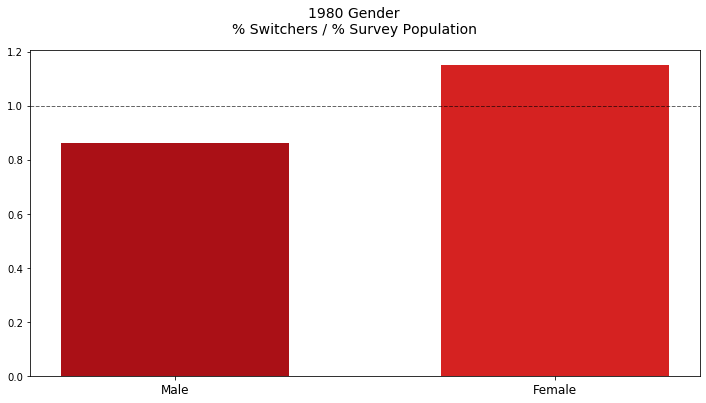

In [711]:
df2 = pd.DataFrame([(data_clean_1980['resp_gender'].value_counts()[data_clean_1980['resp_gender'].value_counts() > 0]/len(data_clean_1980)*100).rename('Switched'),
                    (switched_1980['resp_gender'].value_counts()[switched_1980['resp_gender'].value_counts() > 0]/len(switched_1980) *100).rename('Survey Population')])
df2 = df2.iloc[0].div(df2.iloc[1]).sort_index()
plt.figure(figsize = (12,6))

plt.bar(x = df2.index, height = df2.values, width = 0.6, color = sns.color_palette('Reds_r')) 
plt.xticks(ticks = df2.index, labels = ['Male', 'Female'])
plt.axhline(y=1, linewidth=1, color='k', linestyle = '--', alpha = 0.6)

plt.suptitle('1980 Gender\n% Switchers / % Survey Population', size = 14, fontweight='normal')
plt.xticks(fontsize = 12)
plt.savefig('C:/Users/Yotam/Documents/Courses/Fall 2020/ADS/Fall2020-Project1-yotamsegal/figs/1980 Gender.png', transparent=True)

In [707]:
df2

1. Male      0.863725
2. Female    1.150100
dtype: float64

## Race

In [672]:
# Race of over all sample.
# Some variation, chance or real ? 

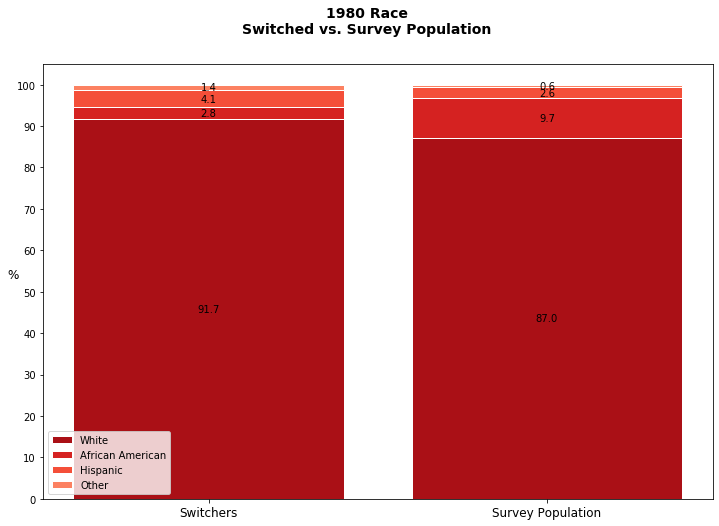

In [673]:
df2 = pd.DataFrame([(switched_1980['race_4_categ'].value_counts()/len(switched_1980) *100).rename('Switched'),
                    (data_clean_1980['race_4_categ'].value_counts()/len(data_clean_1980) *100).rename('Survey Population')])

x = ["Switchers","Survey Population"]

y1 = df2['1. White non-Hispanic'].values
y2 = df2['2. Black non-Hispanic'].values
y3 = df2['3. Hispanic'].values
y4 = df2['4. Other or multiple races, non-Hispanic'].values


# memo of sample number
snum = y1 + y2 + y3 + y4

# normalization
y1 = y1/snum*100.
y2 = y2/snum*100.
y3 = y3/snum*100.
y4 = y4/snum*100.

plt.figure(figsize=(12,8))

# stack bars
barWidth = 0.8
colors = sns.color_palette("Reds")

plt.bar(x, y1, label='White', edgecolor='white', width=barWidth, color=colors[-1])
plt.bar(x, y2 ,bottom=y1,label='African American', edgecolor='white', width=barWidth, color=colors[-2])
plt.bar(x, y3 ,bottom=y1+y2,label= 'Hispanic', edgecolor='white', width=barWidth, color=colors[-3])
plt.bar(x, y4, bottom = y1 + y2 + y3, label = 'Other', edgecolor='white', width=barWidth, color=colors[-4])

# add text annotation corresponding to the percentage of each data.
for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3/2, y3):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3+y4/2, y4):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")    
# add text annotation corresponding to the "total" value of each bar
# for xpos, ypos, yval in zip(x, y1+y2+y3 +y4, snum):
#     plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom")

plt.ylim(0,105)
plt.suptitle('1980 Race\nSwitched vs. Survey Population', size = 14, fontweight='bold')
plt.ylabel('%', rotation = 0, fontsize = 12)
plt.xticks(fontsize = 12)

plt.yticks(ticks = range(0,105,10))
# plt.grid(b = True, axis = 'y')
plt.legend(loc='lower left')

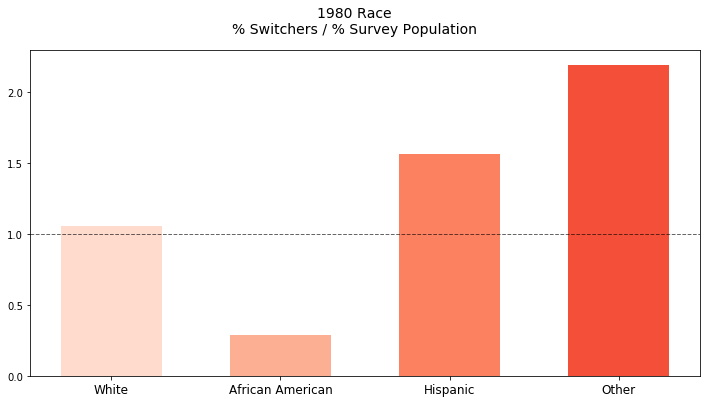

In [674]:
df2 = pd.DataFrame([(switched_1980['race_4_categ'].value_counts()/len(switched_1980) *100).rename('Switched'),
                    (data_clean_1980['race_4_categ'].value_counts()/len(data_clean_1980) *100).rename('Survey Population')])
df2 = df2.iloc[0].div(df2.iloc[1])
plt.figure(figsize = (12,6))

plt.bar(x = df2.index, height = df2.values, width = 0.6, color = sns.color_palette("Reds")) 
plt.xticks(ticks = df2.index, labels = ['White', 'African American', 'Hispanic', 'Other'])
plt.axhline(y=1, linewidth=1, color='k', linestyle = '--', alpha = 0.6)

plt.suptitle('1980 Race\n% Switchers / % Survey Population', size = 14, fontweight='normal')
plt.xticks(fontsize = 12)
plt.savefig('C:/Users/Yotam/Documents/Courses/Fall 2020/ADS/Fall2020-Project1-yotamsegal/figs/1980 Race ratio.png', transparent=True)

## Education

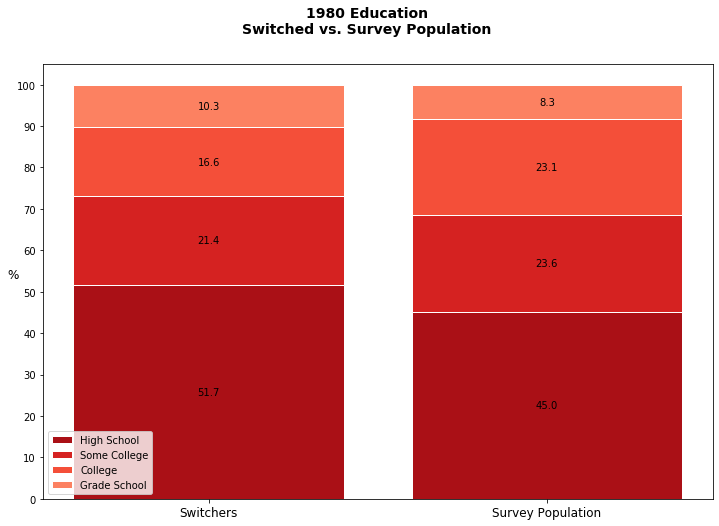

In [675]:
df_educ = pd.DataFrame([((switched_1980['resp_educ']).value_counts()/len(switched_1980) * 100).rename('switched'),
                        (data_clean_1980['resp_educ'].value_counts()/len(data_clean_1980)*100).rename('survey pop')])

x = ["Switchers","Survey Population"]

y1 = df_educ['2. High school (12 grades or fewer, incl. non-college'].values
y2 = df_educ['3. Some college (13 grades or more but no degree;'].values
y3 = df_educ['4. College or advanced degree (no cases 1948)'].values
y4 = df_educ['1. Grade school or less (0-8 grades)'].values


# memo of sample number
snum = y1 + y2 + y3 + y4

# normalization
y1 = y1/snum*100.
y2 = y2/snum*100.
y3 = y3/snum*100.
y4 = y4/snum*100.

plt.figure(figsize=(12,8))

# stack bars
barWidth = 0.8
colors = sns.color_palette("Reds")

plt.bar(x, y1, label='High School', edgecolor='white', width=barWidth, color=colors[-1])
plt.bar(x, y2 ,bottom=y1,label='Some College', edgecolor='white', width=barWidth, color=colors[-2])
plt.bar(x, y3 ,bottom=y1+y2,label= 'College', edgecolor='white', width=barWidth, color=colors[-3])
plt.bar(x, y4, bottom = y1 + y2 + y3, label = 'Grade School', edgecolor='white', width=barWidth, color=colors[-4])

# add text annotation corresponding to the percentage of each data.
for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3/2, y3):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3+y4/2, y4):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")    
# add text annotation corresponding to the "total" value of each bar
# for xpos, ypos, yval in zip(x, y1+y2+y3 +y4, snum):
#     plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom")

plt.ylim(0,105)
plt.suptitle('1980 Education\nSwitched vs. Survey Population', size = 14, fontweight='bold')
plt.ylabel('%', rotation = 0, fontsize = 12)
plt.xticks(fontsize = 12)

plt.yticks(ticks = range(0,105,10))
# plt.grid(b = True, axis = 'y')
plt.legend(loc='lower left')

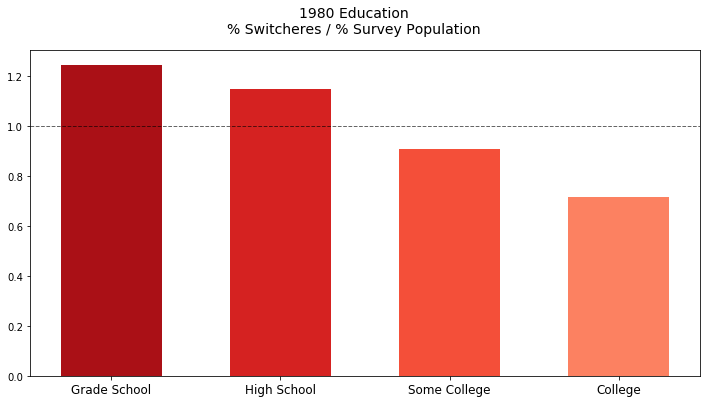

In [721]:
df_educ = pd.DataFrame([((switched_1980['resp_educ']).value_counts()/len(switched_1980) * 100).rename('switched'),
                        (data_clean_1980['resp_educ'].value_counts()/len(data_clean_1980)*100).rename('survey pop')])

df2 = df_educ.iloc[0].div(df_educ.iloc[1]).sort_index()

labels = ['Grade School','High School','Some College', 'College']
plt.figure(figsize = (12,6))
plt.bar(x = df2.index, height = df2.values, width = 0.6, color = sns.color_palette("Reds_r")) 
plt.axhline(y=1, linewidth=1, color='k', linestyle = '--', alpha = 0.6)

plt.xticks(df2.index, labels = labels)
plt.suptitle('1980 Education\n% Switcheres / % Survey Population', size = 14, fontweight='normal')
plt.xticks(fontsize = 12)
plt.savefig('C:/Users/Yotam/Documents/Courses/Fall 2020/ADS/Fall2020-Project1-yotamsegal/figs/1980 educ ratio.png', transparent=True)

In [720]:
df2

1. Grade school or less (0-8 grades)                     1.242947
2. High school (12 grades or fewer, incl. non-college    1.148942
3. Some college (13 grades or more but no degree;        0.906620
4. College or advanced degree (no cases 1948)            0.717241
dtype: float64

In [678]:
# not great variation.
# Interesting to see that college educatedd didn't switch as much. 

## Exposure to Political Information

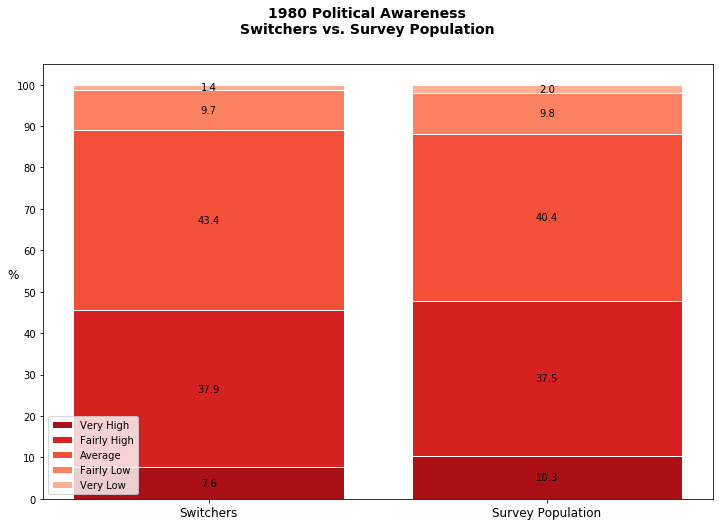

In [679]:
df_info = pd.DataFrame([((switched_1980['resp_level_of_political_info_pre']).value_counts()/len(switched_1980) * 100).rename('switched'),
                        (data_clean_1980['resp_level_of_political_info_pre'].value_counts()/len(data_clean_1980)*100).rename('survey pop')])


x = ["Switchers","Survey Population"]

y1 = df_info['1. Very high'].values
y2 = df_info['2. Fairly high'].values
y3 = df_info['3. Average'].values
y4 = df_info['4. Fairly low'].values
y5 = df_info['5. Very low'].values


# memo of sample number
snum = y1 + y2 + y3 + y4 + y5

# normalization
y1 = y1/snum*100.
y2 = y2/snum*100.
y3 = y3/snum*100.
y4 = y4/snum*100.
y5 = y5/snum*100.

plt.figure(figsize=(12,8))

# stack bars
barWidth = 0.8
colors = sns.color_palette("Reds")
labels = ['Very High', 'Fairly High', 'Average', 'Fairly Low', 'Very Low']

plt.bar(x, y1, label=labels[0], edgecolor='white', width=barWidth, color=colors[-1])
plt.bar(x, y2 ,bottom=y1,label=labels[1], edgecolor='white', width=barWidth, color=colors[-2])
plt.bar(x, y3 ,bottom=y1+y2,label= labels[2], edgecolor='white', width=barWidth, color=colors[-3])
plt.bar(x, y4, bottom = y1 + y2 + y3, label = labels[3], edgecolor='white', width=barWidth, color=colors[-4])
plt.bar(x, y5, bottom = y1 + y2 + y3 + y4, label = labels[4], edgecolor='white', width=barWidth, color=colors[-5])

# add text annotation corresponding to the percentage of each data.
for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3/2, y3):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3+y4/2, y4):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3+y4+y5/2, y5):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center") 
# add text annotation corresponding to the "total" value of each bar
# for xpos, ypos, yval in zip(x, y1+y2+y3 +y4, snum):
#     plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom")

plt.ylim(0,105)
plt.suptitle('1980 Political Awareness\nSwitchers vs. Survey Population', size = 14, fontweight='bold')
plt.ylabel('%', rotation = 0, fontsize = 12)
plt.xticks(fontsize = 12)

plt.yticks(ticks = range(0,105,10))
# plt.grid(b = True, axis = 'y')
plt.legend(loc='lower left')

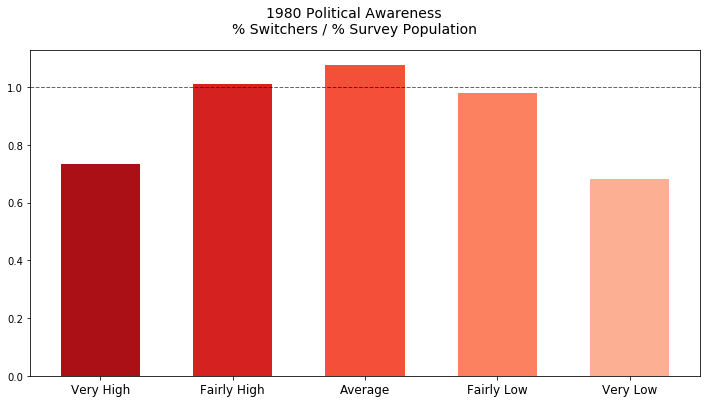

In [680]:
df_info = pd.DataFrame([((switched_1980['resp_level_of_political_info_pre']).value_counts()/len(switched_1980) * 100).rename('switched'),
                        (data_clean_1980['resp_level_of_political_info_pre'].value_counts()/len(data_clean_1980)*100).rename('survey pop')])

df2 = df_info.iloc[0].div(df_info.iloc[1])

labels = ['Very High', 'Fairly High', 'Average', 'Fairly Low', 'Very Low']
plt.figure(figsize = (12,6))
plt.bar(x = df2.index, height = df2.values, width = 0.6, color = sns.color_palette('Reds_r')) 
plt.axhline(y=1, linewidth=1, color='k', linestyle = '--', alpha = 0.6)


plt.xticks(df2.index, labels = labels)
plt.suptitle('1980 Political Awareness\n% Switchers / % Survey Population', size = 14, fontweight='normal')
plt.xticks(fontsize = 12)
plt.savefig('C:/Users/Yotam/Documents/Courses/Fall 2020/ADS/Fall2020-Project1-yotamsegal/figs/1980 political ratio.png', transparent=True)

## interest in elections

In [681]:
pd.DataFrame([((switched_1980['interest_in_elections']).value_counts()/len(switched_1980) * 100).rename('switched'),
                        (data_clean_1980['interest_in_elections'].value_counts()/len(data_clean_1980)*100).rename('survey pop')])


,2. Somewhat interested,3. Very much interested,1. Not much interested,9. DK
switched,55.862069,31.034483,13.103448,0.0
survey pop,46.406053,40.353090,13.240858,0.0


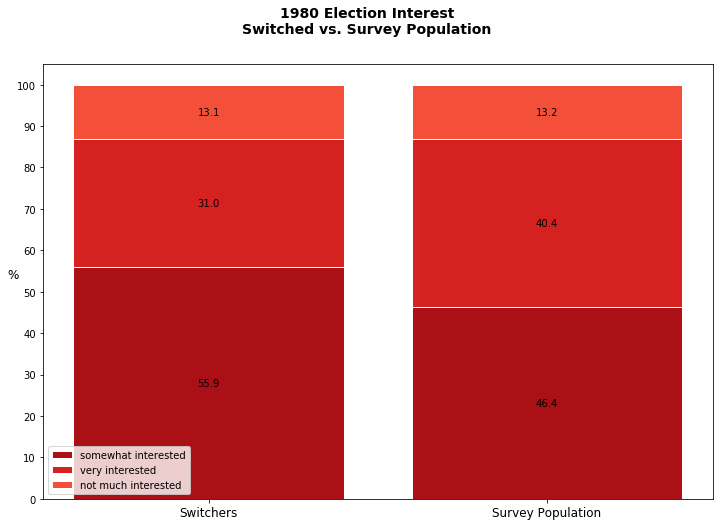

In [682]:
df_interest = pd.DataFrame([((switched_1980['interest_in_elections']).value_counts()/len(switched_1980) * 100).rename('switched'),
                        (data_clean_1980['interest_in_elections'].value_counts()/len(data_clean_1980)*100).rename('survey pop')])
df = df_interest.copy()

x = ["Switchers","Survey Population"]

y1 = df['2. Somewhat interested'].values
y2 = df['3. Very much interested'].values
y3 = df['1. Not much interested'].values


# memo of sample number
snum = y1 + y2 + y3 

# normalization
y1 = y1/snum*100.
y2 = y2/snum*100.
y3 = y3/snum*100.

plt.figure(figsize=(12,8))

# stack bars
barWidth = 0.8
colors = sns.color_palette("Reds")
labels = ['somewhat interested', 'very interested', 'not much interested', 'dont know']

plt.bar(x, y1, label=labels[0], edgecolor='white', width=barWidth, color=colors[-1])
plt.bar(x, y2 ,bottom=y1,label=labels[1], edgecolor='white', width=barWidth, color=colors[-2])
plt.bar(x, y3 ,bottom=y1+y2,label= labels[2], edgecolor='white', width=barWidth, color=colors[-3])

# add text annotation corresponding to the percentage of each data.
for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3/2, y3):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")

plt.ylim(0,105)
plt.suptitle('1980 Election Interest\nSwitched vs. Survey Population', size = 14, fontweight='bold')
plt.ylabel('%', rotation = 0, fontsize = 12)
plt.xticks(fontsize = 12)

plt.yticks(ticks = range(0,105,10))
# plt.grid(b = True, axis = 'y')
plt.legend(loc='lower left')

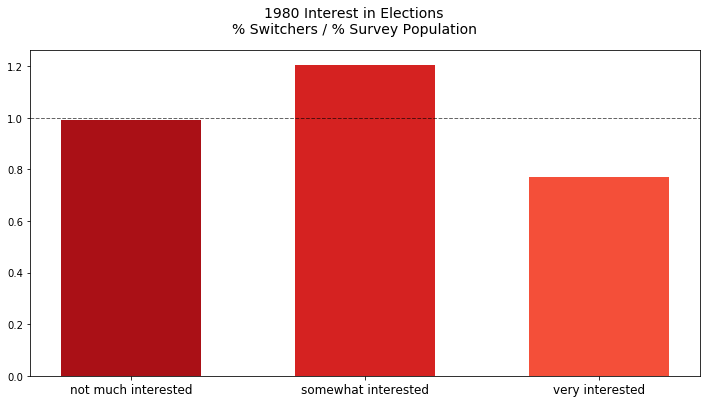

In [716]:
df_interest = pd.DataFrame([((switched_1980['interest_in_elections']).value_counts()/len(switched_1980) * 100).rename('switched'),
                        (data_clean_1980['interest_in_elections'].value_counts()/len(data_clean_1980)*100).rename('survey pop')])

df2 = df_interest.iloc[0].div(df_interest.iloc[1]).dropna().sort_index()

labels = ['not much interested', 'somewhat interested', 'very interested']
plt.figure(figsize = (12,6))
plt.bar(x = df2.index, height = df2.values, width = 0.6, color = sns.color_palette('Reds_r')) 
plt.axhline(y=1, linewidth=1, color='k', linestyle = '--', alpha = 0.6, )


plt.xticks(df2.index, labels = labels)
plt.suptitle('1980 Interest in Elections\n% Switchers / % Survey Population', size = 14, fontweight='normal')
plt.xticks(fontsize = 12)
plt.savefig('C:/Users/Yotam/Documents/Courses/Fall 2020/ADS/Fall2020-Project1-yotamsegal/figs/1980 interest ratio.png', transparent=True)

In [717]:
df2

1. Not much interested     0.989622
2. Somewhat interested     1.203767
3. Very much interested    0.769073
dtype: float64

## Age

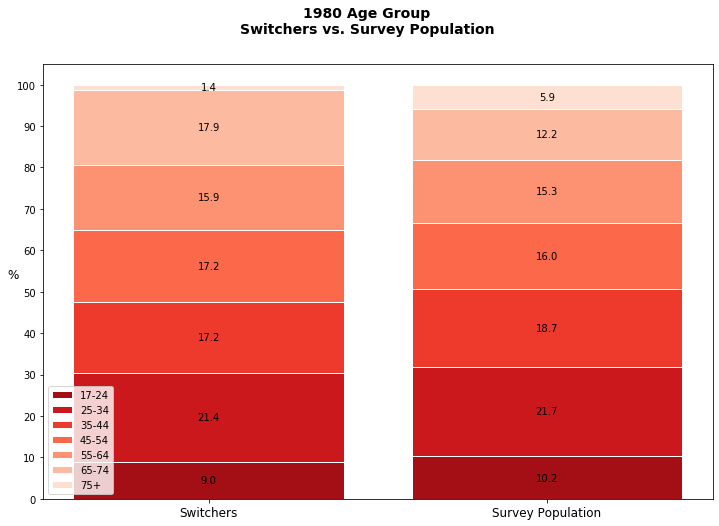

In [685]:
df_age = pd.DataFrame([((switched_1980['resp_age_group']).value_counts()/len(switched_1980) * 100).rename('switched'),
                        (data_clean_1980['resp_age_group'].value_counts()/len(data_clean_1980)*100).rename('survey pop')])
df = df_age.copy()

x = ["Switchers","Survey Population"]

y1 = df['1. 17 - 24'].values
y2 = df['2. 25 - 34'].values
y3 = df['3. 35 - 44'].values
y4 = df['4. 45 - 54'].values
y5 = df['5. 55 - 64'].values
y6 = df['6. 65 - 74'].values
y7 = df['7. 75 - 99 and over (except 1954)'].values


# memo of sample number
snum = y1 + y2 + y3 + y4 + y5 + y6 + y7

# normalization
y1 = y1/snum*100.
y2 = y2/snum*100.
y3 = y3/snum*100.
y4 = y4/snum*100.
y5 = y5/snum*100.
y6 = y6/snum*100.
y7 = y7/snum*100.

plt.figure(figsize=(12,8))

# stack bars
barWidth = 0.8
colors = sns.color_palette("Reds", n_colors = 7)
labels = ['17-24', '25-34', '35-44', '45-54', '55-64','65-74','75+']

plt.bar(x, y1, label=labels[0], edgecolor='white', width=barWidth, color=colors[-1])
plt.bar(x, y2 ,bottom=y1,label=labels[1], edgecolor='white', width=barWidth, color=colors[-2])
plt.bar(x, y3 ,bottom=y1+y2,label= labels[2], edgecolor='white', width=barWidth, color=colors[-3])
plt.bar(x, y4, bottom = y1 + y2 + y3, label = labels[3], edgecolor='white', width=barWidth, color=colors[-4])
plt.bar(x, y5, bottom = y1 + y2 + y3 + y4, label = labels[4], edgecolor='white', width=barWidth, color=colors[-5])
plt.bar(x, y6, bottom = y1 + y2 + y3 + y4 + y5, label = labels[5], edgecolor='white', width=barWidth, color=colors[-6])
plt.bar(x, y7, bottom = y1 + y2 + y3 + y4 +y5 + y6, label = labels[6], edgecolor='white', width=barWidth, color=colors[-7])

# add text annotation corresponding to the percentage of each data.
for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3/2, y3):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3+y4/2, y4):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3+y4+y5/2, y5):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3+y4+y5+y6/2, y6):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center") 
for xpos, ypos, yval in zip(x, y1+y2+y3+y4+y5+y6+y7/2, y7):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center") 
# add text annotation corresponding to the "total" value of each bar
# for xpos, ypos, yval in zip(x, y1+y2+y3 +y4, snum):
#     plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom")

plt.ylim(0,105)
plt.suptitle('1980 Age Group\nSwitchers vs. Survey Population', size = 14, fontweight='bold')
plt.ylabel('%', rotation = 0, fontsize = 12)
plt.xticks(fontsize = 12)

plt.yticks(ticks = range(0,105,10))
# plt.grid(b = True, axis = 'y')
plt.legend(loc='lower left')

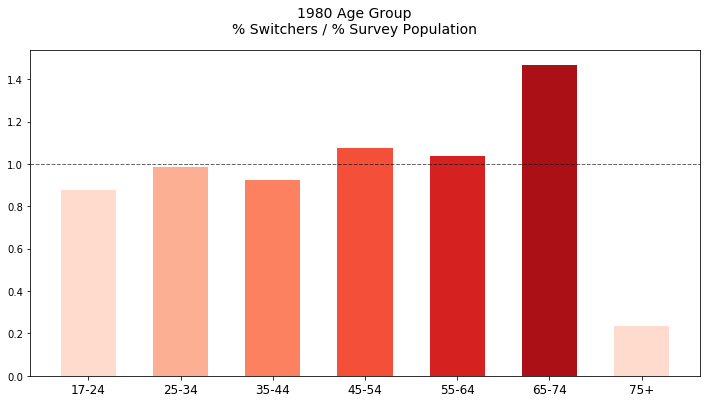

In [686]:
df_age = pd.DataFrame([((switched_1980['resp_age_group']).value_counts()/len(switched_1980) * 100).rename('switched'),
                             (data_clean_1980['resp_age_group'].value_counts()/len(data_clean_1980)*100).rename('survey pop')])

df2 = df_age.iloc[0].div(df_age.iloc[1]).dropna()

labels = ['17-24', '25-34', '35-44', '45-54', '55-64','65-74','75+']
colors =  (0.21568627450980393, 0.5294117647058824, 0.7542483660130719)


plt.figure(figsize = (12,6))
plt.bar(x = df2.index, height = df2.values, width = 0.6, color = sns.color_palette('Reds')) 
plt.axhline(y=1, linewidth=1, color='k', linestyle = '--', alpha = 0.6)


plt.xticks(df2.index, labels = labels)
plt.suptitle('1980 Age Group\n% Switchers / % Survey Population', size = 14, fontweight='normal')
plt.xticks(fontsize = 12)
plt.savefig('C:/Users/Yotam/Documents/Courses/Fall 2020/ADS/Fall2020-Project1-yotamsegal/figs/1980 age ratio.png', transparent=True)

In [687]:
df_age

,1. 17 - 24,2. 25 - 34,3. 35 - 44,4. 45 - 54,5. 55 - 64,6. 65 - 74,7. 75 - 99 and over (except 1954)
switched,8.965517,21.379310,17.241379,17.241379,15.862069,17.931034,1.37931
survey pop,10.214376,21.689786,18.663304,16.015132,15.258512,12.232030,5.92686


## Urban

In [688]:
pd.DataFrame([((switched_1980['urban']).value_counts()/len(switched_1980) * 100).rename('switched'),
                        (data_clean_1980['urban'].value_counts()/len(data_clean_1980)*100).rename('survey pop')])


,2. Suburban areas,"3. Rural, small towns, outlying and adjacent areas",1. Central cities
switched,45.517241,35.862069,18.620690
survey pop,39.974779,33.417402,26.607818


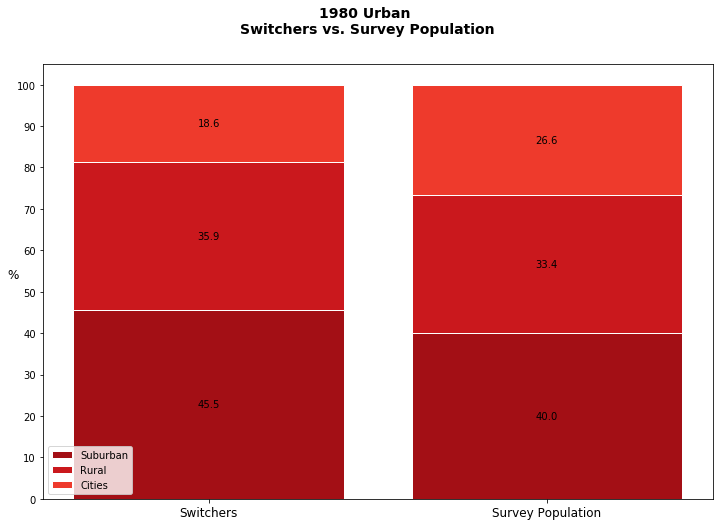

In [689]:
df_urban = pd.DataFrame([((switched_1980['urban']).value_counts()/len(switched_1980) * 100).rename('switched'),
                        (data_clean_1980['urban'].value_counts()/len(data_clean_1980)*100).rename('survey pop')])
df = df_urban.copy()

x = ["Switchers","Survey Population"]

y1 = df['2. Suburban areas'].values
y2 = df['3. Rural, small towns, outlying and adjacent areas'].values
y3 = df['1. Central cities'].values


# memo of sample number
snum = y1 + y2 + y3

# normalization
y1 = y1/snum*100.
y2 = y2/snum*100.
y3 = y3/snum*100.

plt.figure(figsize=(12,8))

# stack bars
barWidth = 0.8
colors = sns.color_palette("Reds", n_colors = 7)
labels = ['Suburban', 'Rural', 'Cities']

plt.bar(x, y1, label=labels[0], edgecolor='white', width=barWidth, color=colors[-1])
plt.bar(x, y2 ,bottom=y1,label=labels[1], edgecolor='white', width=barWidth, color=colors[-2])
plt.bar(x, y3 ,bottom=y1+y2,label= labels[2], edgecolor='white', width=barWidth, color=colors[-3])

# add text annotation corresponding to the percentage of each data.
for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3/2, y3):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")

plt.ylim(0,105)
plt.suptitle('1980 Urban \nSwitchers vs. Survey Population', size = 14, fontweight='bold')
plt.ylabel('%', rotation = 0, fontsize = 12)
plt.xticks(fontsize = 12)

plt.yticks(ticks = range(0,105,10))
# plt.grid(b = True, axis = 'y')
plt.legend(loc='lower left')

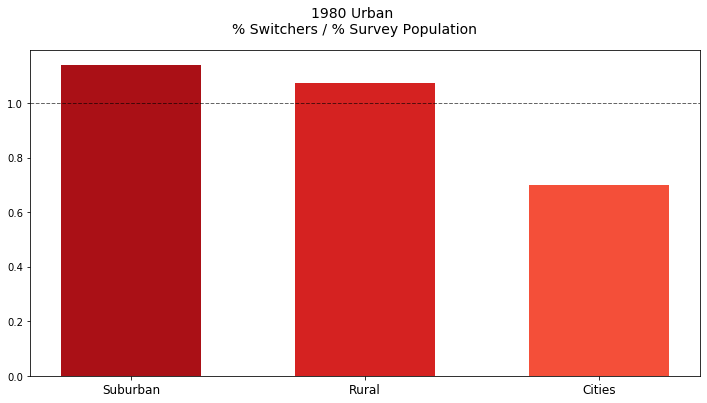

In [690]:
df_urban = pd.DataFrame([((switched_1980['urban']).value_counts()/len(switched_1980) * 100).rename('switched'),
                        (data_clean_1980['urban'].value_counts()/len(data_clean_1980)*100).rename('survey pop')])

df2 = df_urban.iloc[0].div(df_urban.iloc[1]).dropna()

labels = ['Suburban','Rural','Cities']
colors =  (0.21568627450980393, 0.5294117647058824, 0.7542483660130719)


plt.figure(figsize = (12,6))
plt.bar(x = df2.index, height = df2.values, width = 0.6, color = sns.color_palette('Reds_r')) 
plt.axhline(y=1, linewidth=1, color='k', linestyle = '--', alpha = 0.6)


plt.xticks(df2.index, labels = labels)
plt.suptitle('1980 Urban \n% Switchers / % Survey Population', size = 14, fontweight='normal')
plt.xticks(fontsize = 12)
plt.savefig('C:/Users/Yotam/Documents/Courses/Fall 2020/ADS/Fall2020-Project1-yotamsegal/figs/1980 urban ratio.png', transparent=True)

In [691]:
df2

2. Suburban areas                                     1.138649
3. Rural, small towns, outlying and adjacent areas    1.073155
1. Central cities                                     0.699820
dtype: float64

## South / North

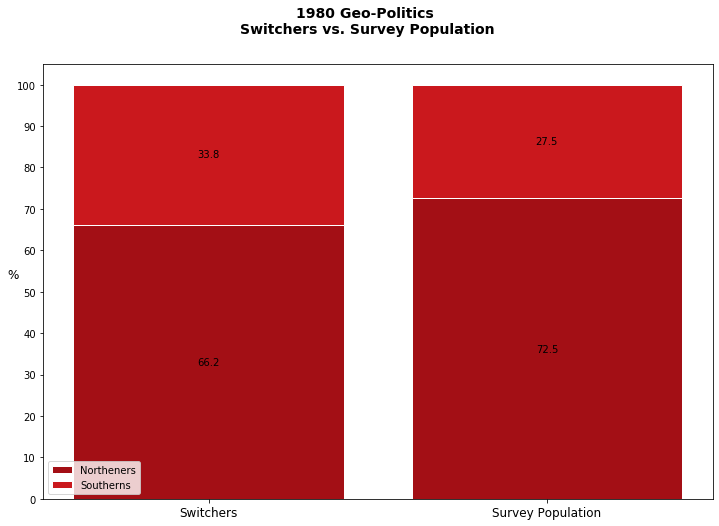

In [692]:
df_south = pd.DataFrame([((switched_1980['resp_south_north']).value_counts()/len(switched_1980) * 100).rename('switched'),
                        (data_clean_1980['resp_south_north'].value_counts()/len(data_clean_1980)*100).rename('survey pop')])
df = df_south.copy()

x = ["Switchers","Survey Population"]

y1 = df['2. Nonsouth'].values
y2 = df['1. South'].values


# memo of sample number
snum = y1 + y2

# normalization
y1 = y1/snum*100.
y2 = y2/snum*100.

plt.figure(figsize=(12,8))

# stack bars
barWidth = 0.8
colors = sns.color_palette("Reds", n_colors = 7)
labels = ['Northeners', 'Southerns']

plt.bar(x, y1, label=labels[0], edgecolor='white', width=barWidth, color=colors[-1])
plt.bar(x, y2 ,bottom=y1,label=labels[1], edgecolor='white', width=barWidth, color=colors[-2])

# add text annotation corresponding to the percentage of each data.
for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")


plt.ylim(0,105)
plt.suptitle('1980 Geo-Politics \nSwitchers vs. Survey Population', size = 14, fontweight='bold')
plt.ylabel('%', rotation = 0, fontsize = 12)
plt.xticks(fontsize = 12)

plt.yticks(ticks = range(0,105,10))
# plt.grid(b = True, axis = 'y')
plt.legend(loc='lower left')

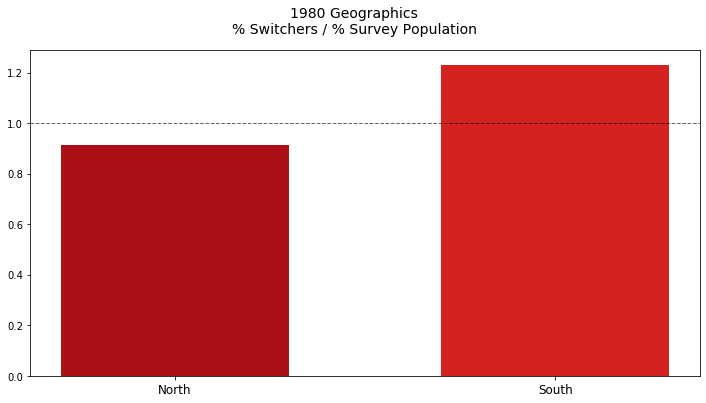

In [693]:
df_south = pd.DataFrame([((switched_1980['resp_south_north']).value_counts()/len(switched_1980) * 100).rename('switched'),
                        (data_clean_1980['resp_south_north'].value_counts()/len(data_clean_1980)*100).rename('survey pop')])

df2 = df_south.iloc[0].div(df_south.iloc[1]).dropna()

labels = ['North','South']

plt.figure(figsize = (12,6))
plt.bar(x = df2.index, height = df2.values, width = 0.6, color = sns.color_palette('Reds_r')) 
plt.axhline(y=1, linewidth=1, color='k', linestyle = '--', alpha = 0.6)


plt.xticks(df2.index, labels = labels)
plt.suptitle('1980 Geographics\n% Switchers / % Survey Population', size = 14, fontweight='normal')
plt.xticks(fontsize = 12)
plt.savefig('C:/Users/Yotam/Documents/Courses/Fall 2020/ADS/Fall2020-Project1-yotamsegal/figs/1980 geo ratio.png', transparent=True)

## Family Income

In [694]:
pd.DataFrame([((switched_1980['fam_inc']).value_counts()/len(switched_1980) * 100).rename('switched'),
                        (data_clean_1980['fam_inc'].value_counts()/len(data_clean_1980)*100).rename('survey pop')])


,3. 34 to 67 percentile,4. 68 to 95 percentile,2. 17 to 33 percentile,1. 0 to 16 percentile,5. 96 to 100 percentile
switched,40.000000,24.137931,18.620690,11.724138,5.517241
survey pop,36.822194,28.625473,14.501892,13.240858,6.809584


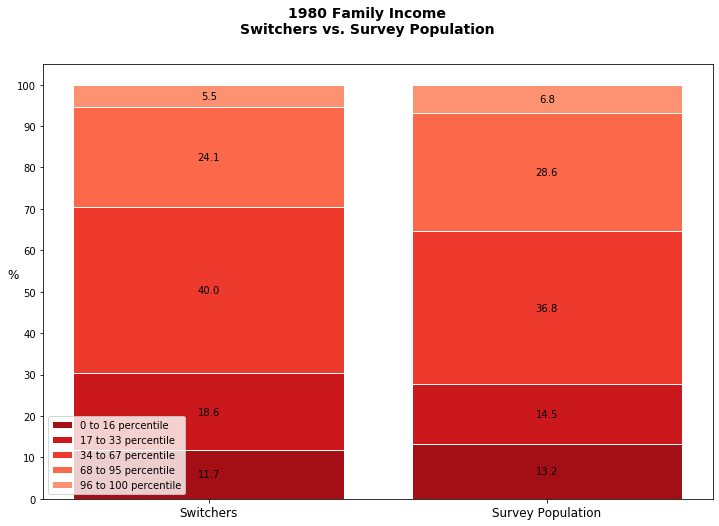

In [695]:
df = pd.DataFrame([((switched_1980['fam_inc']).value_counts()/len(switched_1980) * 100).rename('switched'),
                    (data_clean_1980['fam_inc'].value_counts()/len(data_clean_1980)*100).rename('survey pop')])

x = ["Switchers","Survey Population"]

y1 = df['1. 0 to 16 percentile'].values
y2 = df['2. 17 to 33 percentile'].values
y3 = df['3. 34 to 67 percentile'].values
y4 = df['4. 68 to 95 percentile'].values
y5 = df['5. 96 to 100 percentile'].values


# memo of sample number
snum = y1 + y2 + y3 + y4 + y5

# normalization
y1 = y1/snum*100.
y2 = y2/snum*100.
y3 = y3/snum*100.
y4 = y4/snum*100.
y5 = y5/snum*100.

plt.figure(figsize=(12,8))

# stack bars
barWidth = 0.8
colors = sns.color_palette("Reds", n_colors = 7)
labels = ['0 to 16 percentile', '17 to 33 percentile', '34 to 67 percentile', '68 to 95 percentile', '96 to 100 percentile']

plt.bar(x, y1, label=labels[0], edgecolor='white', width=barWidth, color=colors[-1])
plt.bar(x, y2 ,bottom=y1,label=labels[1], edgecolor='white', width=barWidth, color=colors[-2])
plt.bar(x, y3 ,bottom=y1+y2,label= labels[2], edgecolor='white', width=barWidth, color=colors[-3])
plt.bar(x, y4, bottom = y1 + y2 + y3, label = labels[3], edgecolor='white', width=barWidth, color=colors[-4])
plt.bar(x, y5, bottom = y1 + y2 + y3 + y4, label = labels[4], edgecolor='white', width=barWidth, color=colors[-5])

# add text annotation corresponding to the percentage of each data.
for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3/2, y3):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3+y4/2, y4):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3+y4+y5/2, y5):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")

plt.ylim(0,105)
plt.suptitle('1980 Family Income\nSwitchers vs. Survey Population', size = 14, fontweight='bold')
plt.ylabel('%', rotation = 0, fontsize = 12)
plt.xticks(fontsize = 12)

plt.yticks(ticks = range(0,105,10))
# plt.grid(b = True, axis = 'y')
plt.legend(loc='lower left')

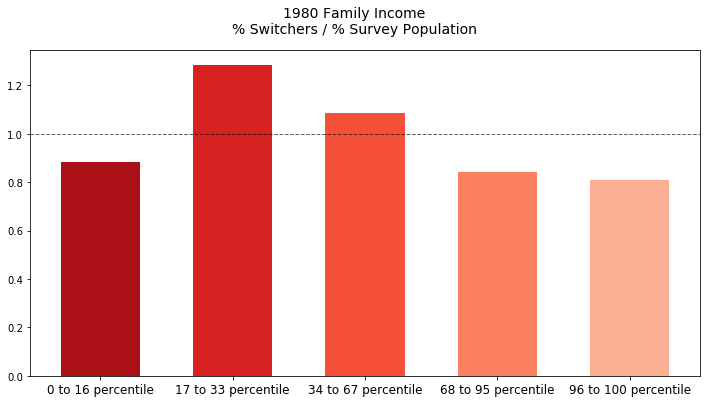

In [696]:
df = pd.DataFrame([((switched_1980['fam_inc']).value_counts()/len(switched_1980) * 100).rename('switched'),
                    (data_clean_1980['fam_inc'].value_counts()/len(data_clean_1980)*100).rename('survey pop')])

df = df[['1. 0 to 16 percentile','2. 17 to 33 percentile', '3. 34 to 67 percentile', '4. 68 to 95 percentile', '5. 96 to 100 percentile']]

df2 = df.iloc[0].div(df.iloc[1]).dropna()

labels = ['0 to 16 percentile', '17 to 33 percentile', '34 to 67 percentile', '68 to 95 percentile', '96 to 100 percentile']
colors =  (0.21568627450980393, 0.5294117647058824, 0.7542483660130719) 

plt.figure(figsize = (12,6))
plt.bar(x = df2.index, height = df2.values, width = 0.6, color = sns.color_palette('Reds_r')) 
plt.axhline(y=1, linewidth=1, color='k', linestyle = '--', alpha = 0.6)


plt.xticks(df2.index, labels = labels)
plt.suptitle('1980 Family Income\n% Switchers / % Survey Population', size = 14, fontweight='normal')
plt.xticks(fontsize = 12)
plt.savefig('C:/Users/Yotam/Documents/Courses/Fall 2020/ADS/Fall2020-Project1-yotamsegal/figs/1980 FamInc.png', transparent=True)

In [697]:
df

,1. 0 to 16 percentile,2. 17 to 33 percentile,3. 34 to 67 percentile,4. 68 to 95 percentile,5. 96 to 100 percentile
switched,11.724138,18.620690,40.000000,24.137931,5.517241
survey pop,13.240858,14.501892,36.822194,28.625473,6.809584


In [698]:
df = df[['1. 0 to 16 percentile','2. 17 to 33 percentile', '3. 34 to 67 percentile', '4. 68 to 95 percentile', '5. 96 to 100 percentile']]

## Married

In [699]:
pd.DataFrame([((switched_1980['married']).value_counts()/len(switched_1980) * 100).rename('switched'),
                    (data_clean_1980['married'].value_counts()/len(data_clean_1980)*100).rename('survey pop')])


,1. Married,2. Never married,3. Divorced,4. Separated,5. Widowed,"7. Partners; not married (VOLUNTEERED [exc.1986,2012])"
switched,66.896552,11.034483,7.586207,1.379310,13.103448,0.000000
survey pop,64.564943,12.862547,8.070618,2.143758,11.475410,0.882724


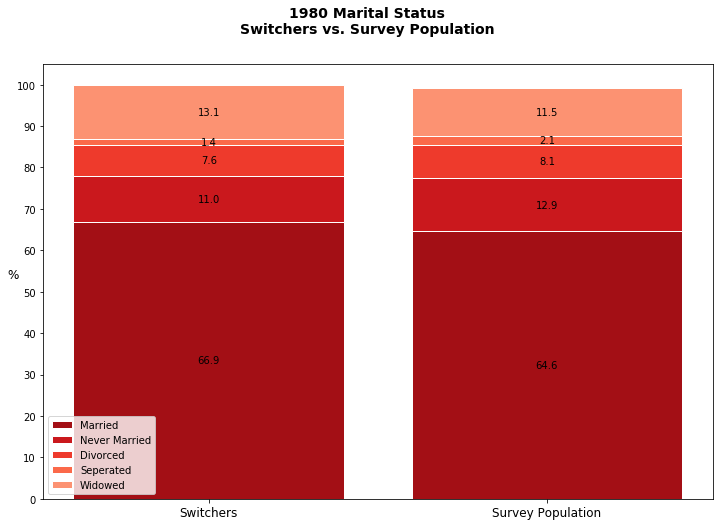

In [700]:
df = pd.DataFrame([((switched_1980['married']).value_counts()/len(switched_1980) * 100).rename('switched'),
                    (data_clean_1980['married'].value_counts()/len(data_clean_1980)*100).rename('survey pop')])

x = ["Switchers","Survey Population"]

y1 = df['1. Married'].values
y2 = df['2. Never married'].values
y3 = df['3. Divorced'].values
y4 = df['4. Separated'].values
y5 = df['5. Widowed'].values
y6 = df['7. Partners; not married (VOLUNTEERED [exc.1986,2012])'].values


# memo of sample number
snum = y1 + y2 + y3 + y4 + y5 + y6

# normalization
y1 = y1/snum*100.
y2 = y2/snum*100.
y3 = y3/snum*100.
y4 = y4/snum*100.
y5 = y5/snum*100.
y6 = y6/snum*100.

plt.figure(figsize=(12,8))

# stack bars
barWidth = 0.8
colors = sns.color_palette("Reds", n_colors = 7)
labels = ['Married', 'Never Married', 'Divorced', 'Seperated', 'Widowed']

plt.bar(x, y1, label=labels[0], edgecolor='white', width=barWidth, color=colors[-1])
plt.bar(x, y2 ,bottom=y1,label=labels[1], edgecolor='white', width=barWidth, color=colors[-2])
plt.bar(x, y3 ,bottom=y1+y2,label= labels[2], edgecolor='white', width=barWidth, color=colors[-3])
plt.bar(x, y4, bottom = y1 + y2 + y3, label = labels[3], edgecolor='white', width=barWidth, color=colors[-4])
plt.bar(x, y5, bottom = y1 + y2 + y3 + y4, label = labels[4], edgecolor='white', width=barWidth, color=colors[-5])


# add text annotation corresponding to the percentage of each data.
for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3/2, y3):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3+y4/2, y4):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3+y4+y5/2, y5):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")

plt.ylim(0,105)
plt.suptitle('1980 Marital Status\nSwitchers vs. Survey Population', size = 14, fontweight='bold')
plt.ylabel('%', rotation = 0, fontsize = 12)
plt.xticks(fontsize = 12)

plt.yticks(ticks = range(0,105,10))
# plt.grid(b = True, axis = 'y')
plt.legend(loc='lower left')

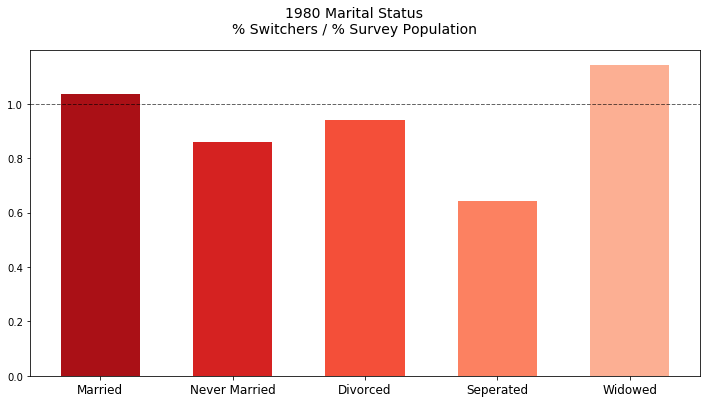

In [718]:
df = pd.DataFrame([((switched_1980['married']).value_counts()/len(switched_1980) * 100).rename('switched'),
                    (data_clean_1980['married'].value_counts()/len(data_clean_1980)*100).rename('survey pop')])

df2 = df.iloc[0].div(df.iloc[1]).dropna().drop('7. Partners; not married (VOLUNTEERED [exc.1986,2012])')


labels = ['Married', 'Never Married', 'Divorced', 'Seperated', 'Widowed']
colors =  (0.21568627450980393, 0.5294117647058824, 0.7542483660130719) 

plt.figure(figsize = (12,6))
plt.bar(x = df2.index, height = df2.values, width = 0.6, color = sns.color_palette('Reds_r')) 
plt.axhline(y=1, linewidth=1, color='k', linestyle = '--', alpha = 0.6)


plt.xticks(df2.index, labels = labels)
plt.suptitle('1980 Marital Status\n% Switchers / % Survey Population', size = 14, fontweight='normal')
plt.xticks(fontsize = 12)
plt.savefig('C:/Users/Yotam/Documents/Courses/Fall 2020/ADS/Fall2020-Project1-yotamsegal/figs/1980 Marital ratio.png', transparent=True)

In [702]:
df

,1. Married,2. Never married,3. Divorced,4. Separated,5. Widowed,"7. Partners; not married (VOLUNTEERED [exc.1986,2012])"
switched,66.896552,11.034483,7.586207,1.379310,13.103448,0.000000
survey pop,64.564943,12.862547,8.070618,2.143758,11.475410,0.882724


## intended_vs_real

Are Switchers impulsive??

In [703]:
pd.DataFrame([((switched_1980['intended_vs_real']).value_counts()/len(switched_1980) * 100).rename('switched'),
                    (data_clean_1980['intended_vs_real'].value_counts()/len(data_clean_1980)*100).rename('survey pop')])



,1. INTENDED Democratic: voted Democratic,2. INTENDED undecided: voted Democratic;,3. INTENDED Republican: voted Democratic,4. INTENDED Democratic: did not vote/voted 'other',5. INTENDED undecided: did not vote/voted 'other',6. INTENDED Republican: did not vote/voted 'other',7. INTENDED Democratic: voted Republican,8. INTENDED undecided: voted Republican; INTENDED,9. INTENDED Republican: voted Republican
switched,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,16.551724,24.137931,59.310345
survey pop,33.039092,4.413619,1.008827,1.387137,6.68348,0.630517,3.909206,7.440101,41.488020


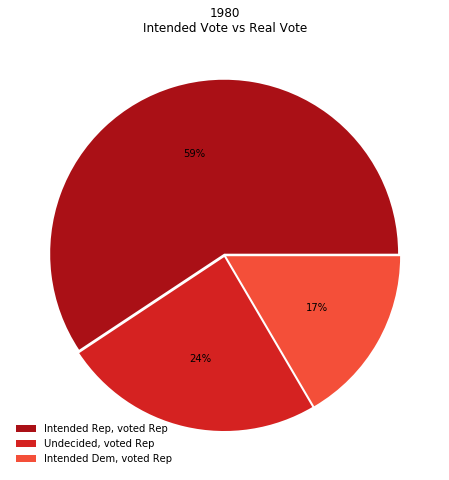

In [715]:
data_pie_intended = switched_1980['intended_vs_real'].value_counts()[switched_1980['intended_vs_real'].value_counts() > 0]
data_pie_intended.index = ['Intended Rep, voted Rep','Undecided, voted Rep','Intended Dem, voted Rep']

p = data_pie_intended.plot.pie(figsize = (12,8),
                          ylabel = '',
                          labels = None,
                          autopct='%.0f%%',
                          explode = (0.01,0.01,0.01),
                          title = '1980\nIntended Vote vs Real Vote',
                          colors = sns.color_palette('Reds_r'))
p.legend(labels = data_pie_intended.index, loc = 'lower left', framealpha = 0)
plt.savefig('C:/Users/Yotam/Documents/Courses/Fall 2020/ADS/Fall2020-Project1-yotamsegal/figs/1980 intendedvsreal.png', transparent=True)